### o	Fashion MNIST and digits MNIST exercises using Keras and tensorflow.

### digits MNIST

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [49]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)


# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


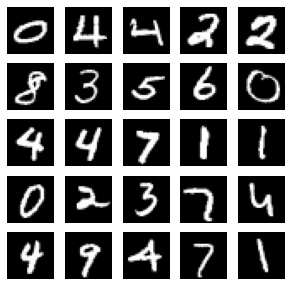

In [50]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

import matplotlib.pyplot as plt
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


In [51]:
num_labels = len(np.unique(y_train))
num_labels

10

In [55]:
# convert to one-hot vector
from keras.utils import to_categorical
#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

print("Shape before one-hot encoding: ", y_train.shape)
y_train = to_categorical(y_train, num_labels)
y_test = to_categorical(y_test, num_labels)
print("Shape after one-hot encoding: ", y_train.shape)


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [56]:
x_train.shape

(60000, 28, 28)

In [57]:
# network parameters
batch_size = 128
hidden_units = 256

In [58]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255


In [59]:
x_train.shape

(60000, 784)

In [60]:
# network parameters
batch_size = 128



In [61]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from keras import models
from keras.regularizers import l2
        
          
model1 = Sequential([
    Dense(256,activation='relu',input_shape=(784,),kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    BatchNormalization(),
    
    Dense(256,activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.1),
    BatchNormalization(),
    
    Dense(10,activation='softmax')
])

In [62]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [63]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
callbacks=[EarlyStopping(monitor='val_accuracy',patience=3)]
model1.fit(x_train, y_train,epochs=100,batch_size=batch_size,validation_split=0.2,callbacks=callbacks)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.7257 - accuracy: 0.9116 - val_loss: 0.4920 - val_accuracy: 0.9580
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.4226 - accuracy: 0.9584 - val_loss: 0.3433 - val_accuracy: 0.9672
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.3201 - accuracy: 0.9636 - val_loss: 0.2942 - val_accuracy: 0.9650
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2697 - accuracy: 0.9669 - val_loss: 0.2518 - val_accuracy: 0.9722
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2371 - accuracy: 0.9688 - val_loss: 0.2512 - val_accuracy: 0.9642
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2266 - accuracy: 0.9704 - val_loss: 0.2342 - val_accuracy: 0.9649
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2166 - accuracy: 0.9702 - val_loss: 0.2201 - val_accuracy: 0.9692

In [68]:
result1=model1.evaluate(x_test, y_test)

In [70]:
print('Test loss,Test acc: ',result1)

Test loss,Test acc:  [0.21375785768032074, 0.9717000126838684]


### Fashion MNIST

In [121]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) =tf.keras.datasets.fashion_mnist.load_data() #split dataset into train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [122]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


In [123]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [124]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [125]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
from keras.utils import to_categorical
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [126]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [127]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [128]:
history1 = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/20
469/469 - 3s - loss: 0.5127 - accuracy: 0.8144 - val_loss: 0.4027 - val_accuracy: 0.8546 - 3s/epoch - 7ms/step
Epoch 2/20
469/469 - 3s - loss: 0.3822 - accuracy: 0.8596 - val_loss: 0.3766 - val_accuracy: 0.8593 - 3s/epoch - 6ms/step
Epoch 3/20
469/469 - 3s - loss: 0.3433 - accuracy: 0.8743 - val_loss: 0.3582 - val_accuracy: 0.8732 - 3s/epoch - 6ms/step
Epoch 4/20
469/469 - 3s - loss: 0.3261 - accuracy: 0.8795 - val_loss: 0.3421 - val_accuracy: 0.8768 - 3s/epoch - 6ms/step
Epoch 5/20
469/469 - 3s - loss: 0.3078 - accuracy: 0.8859 - val_loss: 0.3371 - val_accuracy: 0.8781 - 3s/epoch - 6ms/step
Epoch 6/20
469/469 - 3s - loss: 0.2969 - accuracy: 0.8887 - val_loss: 0.3493 - val_accuracy: 0.8737 - 3s/epoch - 7ms/step
Epoch 7/20
469/469 - 3s - loss: 0.2868 - accuracy: 0.8936 - val_loss: 0.3315 - val_accuracy: 0.8741 - 3s/epoch - 6ms/step
Epoch 8/20
469/469 - 3s - loss: 0.2751 - accuracy: 0.8972 - val_loss: 0.3205 - val_accuracy: 0.8847 - 3s/epoch - 6ms/step
Epoch 9/20
469/469 - 3s 

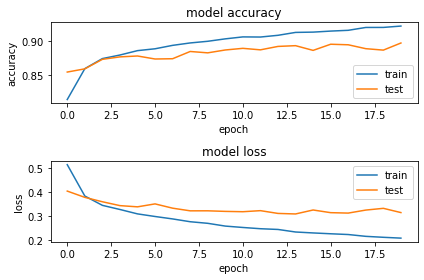

In [130]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')



plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
